### Tarea 4 Regresión Softmax -Estuardo Funes Solares 20032042

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import datetime

## Cargamos la data 

El dataset Fashion-MNIST cotiene 60,00 imagenes para el set de datos de entrenamiento y un set de datos de prueba de 10,000.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Imagenes
Las imagenes son Numpy Arrays de 28x28, los pixeles estan entre los valores de 0 a 255

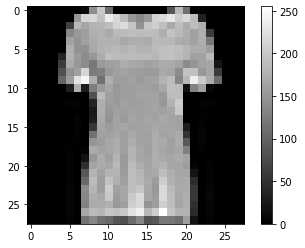

In [4]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Labels

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

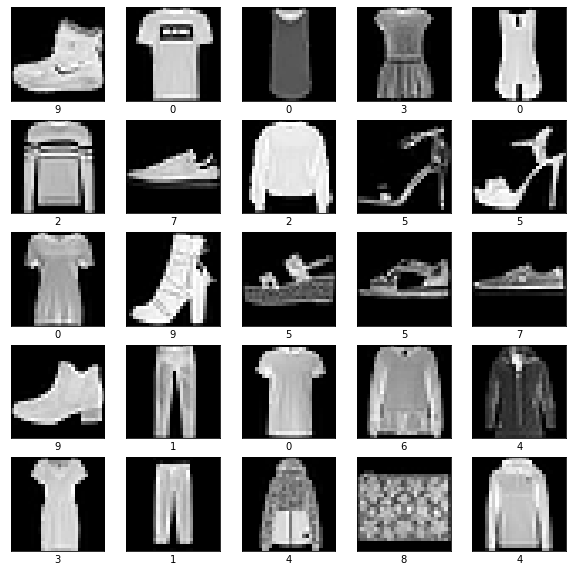

In [6]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

# Tarea

Para esta tarea se deben utilizar únicamente 3 clases, se puede escoger cualquiera de las 10 disponibles en el data set, por lo que hay que filtrar las clases elegidas en los arreglos:
- train_images
- train_labels
- test_images
- test_labels

El objetivo de la tarea es comparar la diferencia al aplicar feature scale/normalization y las features sin ninguna transformación y comparar el efecto de el scaling/normalización sobre el entrenamiento con regresión logística.
- Se debe crear un diccionario con el valor numérico de las labels y el texto correspondiente para poder relacionar el valor numérico con el valor descriptivo/textual.
- Aplicar regresión logística con entropía cruzada como función de costo, crear una función que recibe de entrada un tensor x y predice la clase(utilizar el diccionario para mostrar el texto perteneciente al label).
- Adicional a el costo(por entropía cruzada) en el grafo se debe agregar un nodo que calcule el acurracy(comparando el valor real vs el estimado por el modelo).
- El accuracy y el costo deben ser agregados a tensorboard (agregar screenshots al notebook)
- Se debe agregar al notebook un screenshot del grafo/grafos de tensorboard, simplificando(usando names y name_scope como visto en clase).
- Todo lo anterior se debe hacer tanto para datos crudos, como para datos transformados con (normalización y escalado)
- Basado en los ejemplos de visualización de imagenes en el notebook ,crear una función que reciba de entrada el tensor que representa a una imagen, grafique esta imagen poniendo como título el nombre de la prenda con mayor probabilidad.
- Utilizar la función anterior para mostrar una muestra aleatoria de 5 imágenes(y la predicción probabilistica de la prenda)
- Comparar con tensorboard las curvas de aprendizaje del entrenamiento con datos crudos vs datos transformados, y los 2 grafos y concluir/opinar al respecto usando markdown(agregando screenshots)
- Utilizar mini batch gradient descent con batch size de 32

#### Carga de datos

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#### Diccionario con valor números de las labels

In [8]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [9]:
labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### Exploración de Datos

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

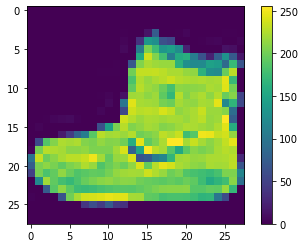

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### Diccionario para mostrar el texto perteneciente al label

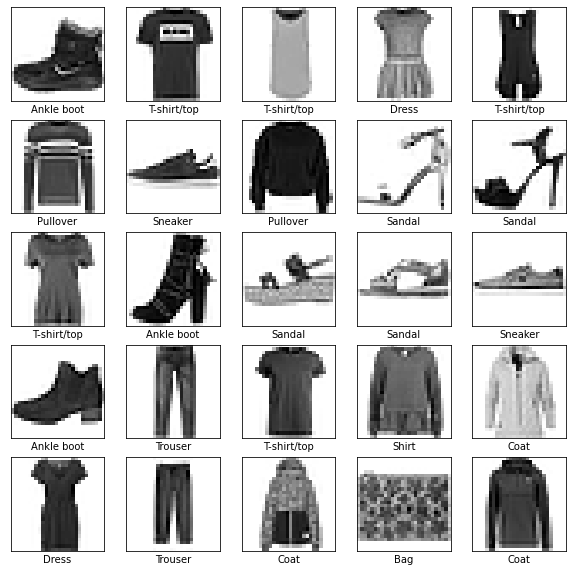

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Modelo

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [21]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.8233987 , -0.11802445,  0.30502546, -0.2116436 ,  0.50245905,
         0.74800175,  0.30533323,  0.45727432,  0.18527195,  0.4328971 ]],
      dtype=float32)

In [22]:
tf.nn.softmax(predictions).numpy()

array([[0.1541378 , 0.06012489, 0.09178729, 0.0547515 , 0.1118219 ,
        0.14294359, 0.09181554, 0.1068817 , 0.08142809, 0.10430773]],
      dtype=float32)

In [23]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
loss_fn(y_train[:1], predictions).numpy()

1.9453051

In [25]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

#### Entrenamiento y Evaluación del Modelo

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5355 - accuracy: 0.8101
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4012 - accuracy: 0.8528
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3666 - accuracy: 0.8651
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3464 - accuracy: 0.8727
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3302 - accuracy: 0.8774
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3174 - accuracy: 0.8841
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3057 - accuracy: 0.8860
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.8884
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2892 - accuracy: 0.8921
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.285

In [27]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3876 - accuracy: 0.8837
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1873 - accuracy: 0.9442
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1449 - accuracy: 0.9545
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1186 - accuracy: 0.9634
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1012 - accuracy: 0.9676


In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 6.9385 - accuracy: 0.2421 - 2s/epoch - 5ms/step

Test accuracy: 0.24210000038146973


In [29]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [53]:
predictions[9]

array([ -6.211285  , -19.002539  ,  -1.2690848 ,  -8.327582  ,
       -11.411462  ,  -0.65884477, -12.100531  ,  -0.18934457,
        -3.9093153 ,  -8.632804  ], dtype=float32)

In [54]:
np.argmax(predictions[9])

7

In [55]:
test_labels[9]

7

In [56]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

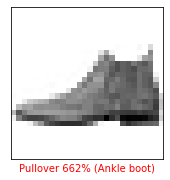

In [57]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
plt.show()

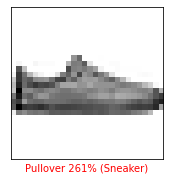

In [58]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
plt.show()

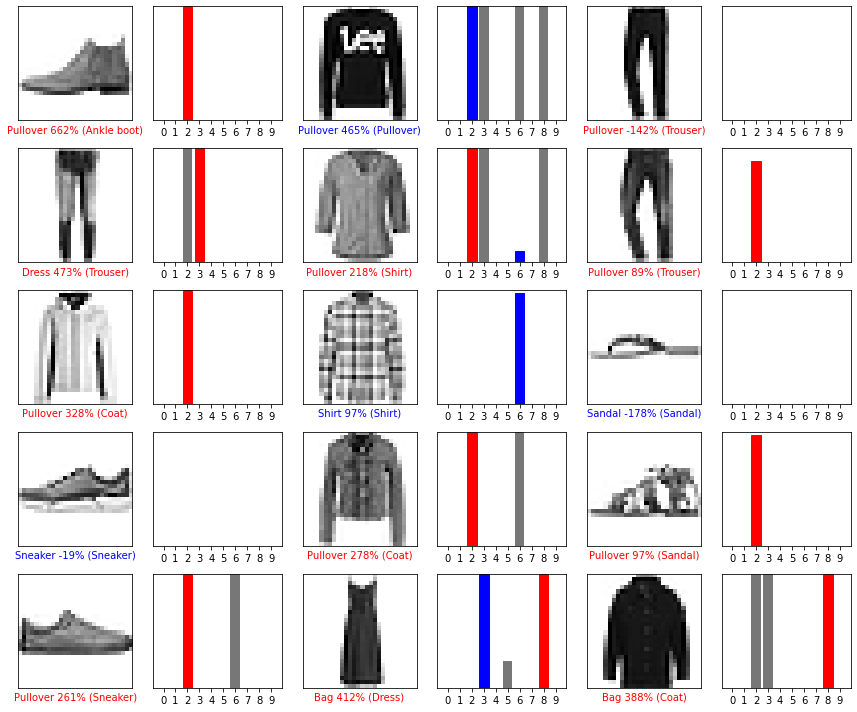

In [59]:
# Plot de primeras X imagenes de test, su predicción de etiqueta y tu etiqueta verdadera.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [38]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 45ms/step
[[ -2.9897835   -1.8312308    3.8599489   -0.88691944 -10.159056
   -5.0932884    0.9247415   -5.2864704    3.0348778  -17.327574  ]]


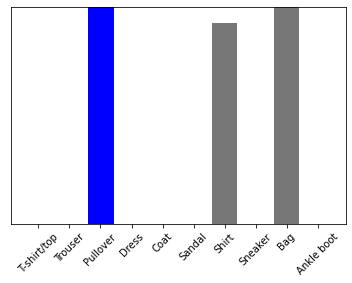

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

2

#### Validación

In [43]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0869 - accuracy: 0.9739 - 841ms/epoch - 3ms/step


[0.086907297372818, 0.9739000201225281]

In [44]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [45]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.6393152e-10, 3.6744980e-09, 1.1117215e-05, 5.6524357e-05,
        3.8606887e-09, 2.5029481e-09, 2.0426204e-13, 9.9993229e-01,
        1.2999651e-08, 1.1760788e-07],
       [1.1521276e-07, 2.4561839e-06, 9.9999511e-01, 1.2359859e-06,
        4.5682022e-12, 3.1543270e-09, 8.7057145e-07, 1.1153269e-10,
        2.3638049e-07, 3.9290164e-13],
       [4.9478315e-09, 9.9988818e-01, 9.0855883e-06, 1.2648511e-06,
        3.9193277e-05, 1.2029282e-06, 7.3125921e-06, 3.0620293e-05,
        2.1910608e-05, 1.2435468e-06],
       [9.9995542e-01, 1.3966811e-10, 3.3701359e-05, 3.1396735e-07,
        7.6540721e-07, 6.3761678e-07, 5.1606758e-06, 1.0667190e-08,
        1.1056289e-06, 2.9450614e-06],
       [1.7503852e-06, 5.9584104e-10, 5.3613485e-07, 1.1506351e-07,
        9.9970031e-01, 7.2202914e-07, 7.1765925e-08, 4.4075659e-06,
        6.5930800e-07, 2.9145073e-04]], dtype=float32)>

In [57]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [58]:
n = len(train_labels)

In [59]:
#tf.reset_default_graph()
tf.compat.v1.reset_default_graph()
g = tf.Graph()
with g.as_default():
    X = tf.placeholder("float", [None,6], name="X")
    Y = tf.placeholder("float", [None,1], name="Y")
    learning_rate = tf.placeholder("float")
    W = tf.Variable(tf.zeros((6,1)), name = "W", dtype="float")
    b = tf.Variable(tf.zeros(1), name = "b", dtype="float")
    with tf.name_scope("model"):
        y_pred = tf.add(tf.matmul(X,W), b)
    with tf.name_scope("cost"):
        cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2*n)
        cost_summary = tf.summary.scalar("cost", cost)
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

In [62]:
def training(lr):
    #tf.reset_default_graph()
    tf.compat.v1.reset_default_graph()
    
    with tf.Session(graph=g) as sess:
        
        writer = tf.summary.FileWriter('./graph/lr='+str(lr)+"polinomio=2", sess.graph)
        sess.run(init)
        for epoch in range(51):
                                       
            sess.run(optimizer, feed_dict = {X : x_train, Y : y_train, learning_rate:lr})
                                       
            if (epoch+1) % 10 == 0:
                c,co,we,inte=sess.run([cost_summary,cost,W,b], feed_dict = {X : x, Y : y, learning_rate:lr})
            
                writer.add_summary(c, epoch+1)
                print("Epoch", (epoch + 1), ": cost= ", co, "W = ", we, "b = ", inte)
                                       
        writer.close()

In [60]:
#training(0.0001)

#### Imagen de Carpeta Log

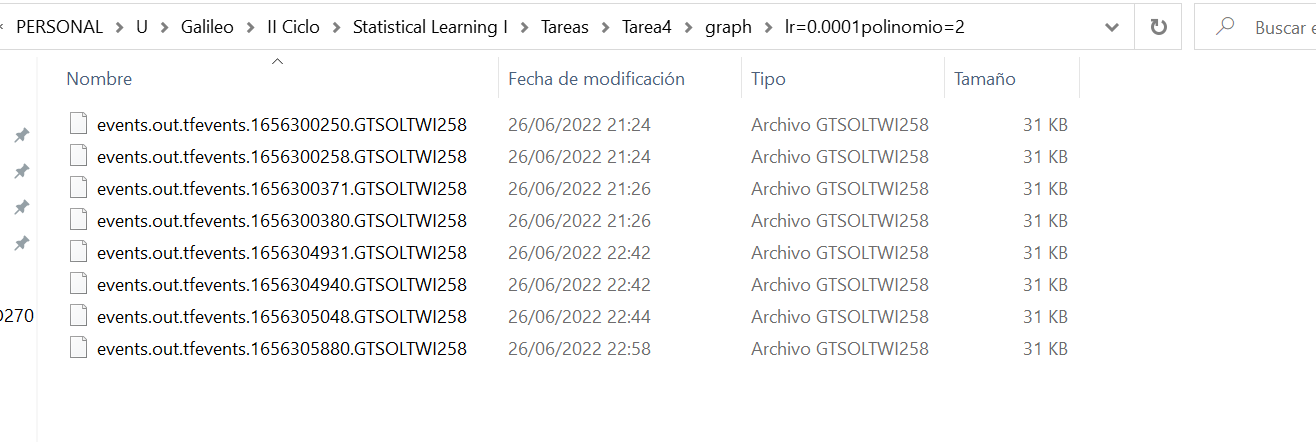